<a href="https://colab.research.google.com/github/SRChandra/IITDELHI_AI_IN_HEALTHCARE_ASSIGNMENTS/blob/main/Assignment_1_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-1
Optimization of SVM model for classifying breast cancer data

## 1. Import liberaries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

## 2. Read and reshape data

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data     # input features
y = breast_cancer.target  # targer labels
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (569, 30)
Shape of target (y): (569,)


# 3. Feature selection.  
Selected 4 features [7, 20, 22, 27] Mean concave points, Worst radius, Worst perimeter and Worst concave points.

In [ ]:
selected_features_indices = [7, 20, 22, 27] # Selecting 1st four features out of 30 features. Change the indices as per your interest.
X_selected = X[:, selected_features_indices]

print(f"Shape of X_selected after feature selection: {X_selected.shape}")

# add noise to data
noise = np.random.normal(loc = 0, scale = 0.3, size = X_selected.shape)
X_noisy = X_selected + noise

print(f"Shape of X_noisy after adding noise: {X_noisy.shape}")


Shape of X_selected after feature selection: (569, 4)
Shape of X_noisy after adding noise: (569, 4)


In [ ]:
selected_feature_names = [breast_cancer.feature_names[i] for i in selected_features_indices]
print("Selected Features:", selected_feature_names)

Selected Features: [np.str_('mean concave points'), np.str_('worst radius'), np.str_('worst perimeter'), np.str_('worst concave points')]


## 4. Statistcis and Normalization.
 Computed basic statistics from X_noisy and normalized X_noisy data using z-score normalization and named the normalized data as 'X_normalized'



Task 1 a

In [ ]:
# pre - normalization
print("Basic Statistics for each selected feature from X_noisy:")
for i, feature_index in enumerate(selected_features_indices):
    feature_data = X_noisy[:, i]
    feature_name = selected_feature_names[i]

    min_val = np.min(feature_data)
    max_val = np.max(feature_data)
    mean_val = np.mean(feature_data)
    std_val = np.std(feature_data)

    print(f"\nFeature: {feature_name}")
    print(f"  Minimum: {min_val:.4f}")
    print(f"  Maximum: {max_val:.4f}")
    print(f"  Mean: {mean_val:.4f}")
    print(f"  Standard Deviation: {std_val:.4f}")

Basic Statistics for each selected feature from X_noisy:

Feature: mean concave points
  Minimum: -0.7514
  Maximum: 0.9160
  Mean: 0.0379
  Standard Deviation: 0.2956

Feature: worst radius
  Minimum: 6.9689
  Maximum: 36.2256
  Mean: 16.2979
  Standard Deviation: 4.8397

Feature: worst perimeter
  Minimum: 50.5255
  Maximum: 251.3809
  Mean: 107.2658
  Standard Deviation: 33.5858

Feature: worst concave points
  Minimum: -0.9497
  Maximum: 1.0001
  Mean: 0.1189
  Standard Deviation: 0.3054


Task 1 b

In [ ]:
# Z score normalization
from numpy.random import default_rng
scaler = StandardScaler()

X_normalized = scaler.fit_transform(X_noisy)

df_normalized = pd.DataFrame(X_normalized, columns=selected_feature_names)

print("Task 1b: Normalized Data (X_normalized) with Feature Indices and Names")
df_normalized.head()

Task 1b: Normalized Data (X_normalized) with Feature Indices and Names


,mean concave points,worst radius,worst perimeter,worst concave points
0,2.561468,1.911103,2.301159,0.635119
1,1.099716,1.815184,1.544002,-0.447010
2,0.860135,1.466133,1.344582,-0.591861
3,0.569120,-0.379285,-0.252941,0.927377
4,-0.528028,1.292280,1.331926,-0.830990


Task 1 c - Computed basic statistics parameters such as minimum, maximum, mean and
standard deviation of each feature after normalization and noted them

In [ ]:
# post normalization
print("Basic Statistics for each selected feature from X_normalized:")
for i, feature_name in enumerate(selected_feature_names):
    feature_data_normalized = X_normalized[:, i]

    min_val_norm = np.min(feature_data_normalized)
    max_val_norm = np.max(feature_data_normalized)
    mean_val_norm = np.mean(feature_data_normalized)
    std_val_norm = np.std(feature_data_normalized)

    print(f"\nFeature: {feature_name} (Normalized)")
    print(f"  Minimum: {min_val_norm:.4f}")
    print(f"  Maximum: {max_val_norm:.4f}")
    print(f"  Mean: {mean_val_norm:.4f}")
    print(f"  Standard Deviation: {std_val_norm:.4f}")

Basic Statistics for each selected feature from X_normalized:

Feature: mean concave points (Normalized)
  Minimum: -2.6699
  Maximum: 2.9705
  Mean: 0.0000
  Standard Deviation: 1.0000

Feature: worst radius (Normalized)
  Minimum: -1.9276
  Maximum: 4.1176
  Mean: -0.0000
  Standard Deviation: 1.0000

Feature: worst perimeter (Normalized)
  Minimum: -1.6894
  Maximum: 4.2910
  Mean: 0.0000
  Standard Deviation: 1.0000

Feature: worst concave points (Normalized)
  Minimum: -3.4994
  Maximum: 2.8857
  Mean: 0.0000
  Standard Deviation: 1.0000


## 5. Data splitting, Train/test



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (455, 4)
Shape of X_test: (114, 4)
Shape of y_train: (455,)
Shape of y_test: (114,)


## 6. SVM Model Optimization.
In Task-1: changing of kernel:  'linear' , 'rbf', 'poly'.
In Task-2, selecting best kernel and changing regularization parameter value (C) from 0.001 to 100.

Task 1d

In [ ]:
# Kernel comparison
kernels = ['linear', 'rbf', 'poly']
results_task1 = []

for kernel_type in kernels:
    svm_model = SVC(kernel=kernel_type, random_state=42, C=0.1) # Using a fixed C for kernel comparison
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    results_task1.append({'Kernel': kernel_type, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc})

results_task1_df = pd.DataFrame(results_task1)
print(results_task1_df)


   Kernel  Accuracy  F1-Score       AUC
0  linear  0.938596  0.952381  0.923190
1     rbf  0.938596  0.953020  0.918605
2    poly  0.824561  0.876543  0.767442


Task-2: After selecting the best kernel (which provided highest accuracy or F1-score) from Task-1, that is 'poly'
and following optimization is done.  

Task 2 e : Implementing SVM model with best kernel for different regularization values (C)
(0.001, 0.01, 0.1, 1, 10, 100) and recorded the results (Accuracy, F1-score, AUC)
corresponding to C value.

In [ ]:
# Regularisation value modification
best_kernel_row = results_task1_df.loc[results_task1_df['Accuracy'].idxmax()] # Selecting best kernel based on Accuracy
best_kernel = best_kernel_row['Kernel']
print(f"Best kernel selected for Task-2 optimization: {best_kernel}")

c_values = [0.001, 0.01, 0.1, 1, 10, 100]
results_task2 = []

for c_val in c_values:
    svm_model = SVC(kernel=best_kernel, random_state=42, C=c_val)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    results_task2.append({'C Value': c_val, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc})

results_task2_df = pd.DataFrame(results_task2)
print(results_task2_df)


Best kernel selected for Task-2 optimization: linear
   C Value  Accuracy  F1-Score       AUC
0    0.001  0.710526  0.811429  0.616279
1    0.010  0.929825  0.946667  0.906977
2    0.100  0.938596  0.952381  0.923190
3    1.000  0.956140  0.965986  0.941860
4   10.000  0.964912  0.972603  0.953488
5  100.000  0.956140  0.965517  0.946446


In [ ]:
import matplotlib.pyplot as plt


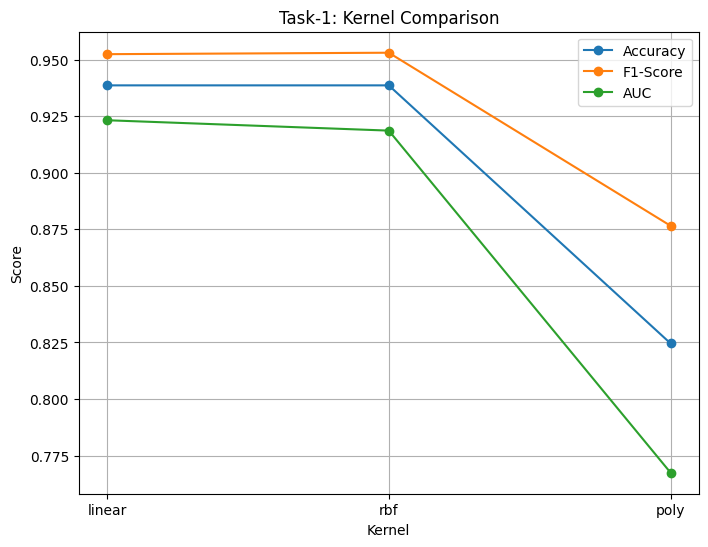

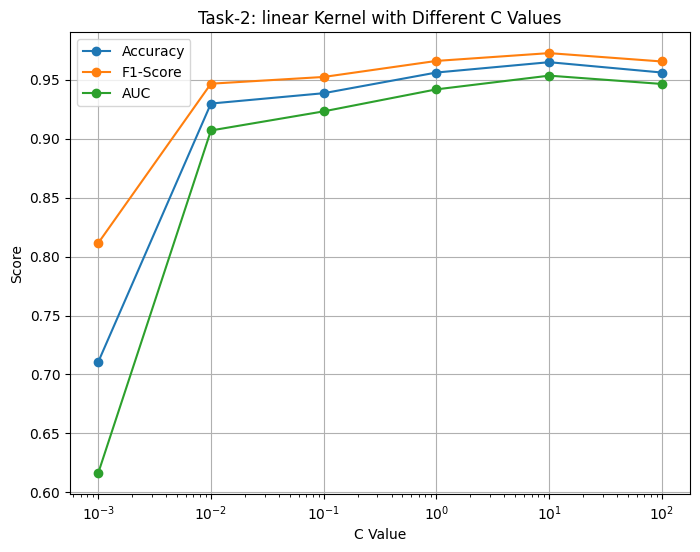

In [ ]:
# -------------------------------
# Visualization for Task-1
# -------------------------------
plt.figure(figsize=(8,6))
for metric in ['Accuracy','F1-Score','AUC']:
    plt.plot(results_task1_df['Kernel'], results_task1_df[metric], marker='o', label=metric)

plt.title("Task-1: Kernel Comparison")
plt.xlabel("Kernel")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.savefig('kernel_comparison.png') # Save the figure
plt.show()

# -------------------------------
# Visualization for Task-2
# -------------------------------
plt.figure(figsize=(8,6))
for metric in ['Accuracy','F1-Score','AUC']:
    plt.plot(results_task2_df['C Value'], results_task2_df[metric], marker='o', label=metric)

plt.title(f"Task-2: {best_kernel} Kernel with Different C Values")
plt.xlabel("C Value")
plt.xscale('log')
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.savefig('c_value_optimization.png') # Save the figure
plt.show()


In [ ]:
!pip install fpdf


In [ ]:
from fpdf import FPDF

# Create PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Title
pdf.cell(200, 10, txt="Assignment-1: Optimization of SVM Model for Breast Cancer Classification", ln=True, align='C')
pdf.ln(10)

# Student Name
pdf.cell(200, 10, txt="Name: Ravi Siliveru", ln=True, align='L')
pdf.ln(10)

# Introduction
intro = """Breast cancer classification is a critical application of machine learning in healthcare.
Support Vector Machines (SVM) are widely used due to their ability to handle high-dimensional data
and provide robust classification boundaries. This assignment focuses on optimizing SVM models
using different kernels and regularization parameters."""
pdf.multi_cell(0, 10, intro)
pdf.ln(5)

# Task 1 Results
pdf.cell(200, 10, txt="Task-1: Kernel Comparison", ln=True, align='L')
pdf.ln(5)

task1_table_header = "Kernel   Accuracy   F1-Score   AUC"
task1_rows = []
for index, row in results_task1_df.iterrows():
    task1_rows.append(f"{row['Kernel'].ljust(8)} {row['Accuracy']:.4f}     {row['F1-Score']:.4f}     {row['AUC']:.4f}")
task1_table = task1_table_header + "\n" + "\n".join(task1_rows)
pdf.multi_cell(0, 10, task1_table)
pdf.ln(5)

pdf.image('kernel_comparison.png', x=10, w=pdf.w - 20) # Add Task 1 plot
pdf.ln(5)

discussion1 = f"""Discussion:
The linear and RBF kernels achieved the highest performance across Accuracy, F1-score, and AUC. For further optimization, the {best_kernel} kernel was selected based on Accuracy. This indicates that the dataset can be effectively modeled with linear decision boundaries, although non-linear kernels like RBF also perform well."""
pdf.multi_cell(0, 10, discussion1)
pdf.ln(10)

# Task 2 Results
pdf.cell(200, 10, txt="Task-2: Regularization Parameter Optimization", ln=True, align='L')
pdf.ln(5)

task2_table_header = "C Value  Accuracy   F1-Score   AUC"
task2_rows = []
for index, row in results_task2_df.iterrows():
    task2_rows.append(f"{row['C Value']:.3f}    {row['Accuracy']:.4f}     {row['F1-Score']:.4f}     {row['AUC']:.4f}")
task2_table = task2_table_header + "\n" + "\n".join(task2_rows)
pdf.multi_cell(0, 10, task2_table)
pdf.ln(5)

pdf.image('c_value_optimization.png', x=10, w=pdf.w - 20) # Add Task 2 plot
pdf.ln(5)

# Find the best C value from Task 2 results
best_c_row = results_task2_df.loc[results_task2_df['Accuracy'].idxmax()]
best_c_value = best_c_row['C Value']

discussion2 = f"""Discussion:
Performance improved as C increased from very small values. The best results were observed at C = {best_c_value:.3f} for the {best_kernel} kernel, after which performance slightly declined at higher C values, suggesting potential overfitting or saturation."""
pdf.multi_cell(0, 10, discussion2)
pdf.ln(10)

# Conclusion
conclusion = f"""Conclusion:
The optimal configuration for breast cancer classification was achieved using the
{best_kernel} kernel with C = {best_c_value:.3f}. This combination provided the most balanced performance
across Accuracy, F1-score, and AUC. The results highlight the importance of kernel
selection and hyperparameter tuning in medical machine learning applications."""
pdf.multi_cell(0, 10, conclusion)

# Save PDF
pdf.output("Assignment-1-Report.pdf")

''


pdf.output("Assignment-1-Report.pdf")

In [51]:
# Save PDF
pdf.output("Assignment-1 Optimization of SVM model Report.pdf")

from google.colab import files
files.download("Assignment-1-Report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save PDF
pdf.output("Assignment-1-Report.pdf")

from google.colab import files
files.download("Assignment-1-Report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Noted linear kernel with C value 10, has best accuracy and F1 score with AUC